In [1]:
import pandas as pd
from config import api_key
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import datetime

In [2]:
culture_rain_data = pd.read_csv("Milwaukee_Culture_Rainfall.csv", index_col=0)
culture_rain_data

,Date,Rainfall (In)
163,2008-07-01,0.0
451,2008-07-02,0.0
11,2008-07-03,0.0
669,2008-07-04,0.0
703,2008-07-05,0.0
...,...,...
755,2016-09-25,0.0
312,2016-09-28,0.0
754,2016-09-29,0.0
710,2016-09-30,0.0


In [3]:
culture_rain_data["Date"] = pd.to_datetime(culture_rain_data["Date"],format= "%Y-%m-%d")
culture_rain_data["Date"] = pd.to_datetime(culture_rain_data["Date"], yearfirst=True)
culture_rain_data["Year"] = pd.DatetimeIndex(culture_rain_data["Date"]).year
culture_rain_data["Month"] = pd.DatetimeIndex(culture_rain_data["Date"]).month
culture_rain_data

,Date,Rainfall (In),Year,Month
163,2008-07-01,0.0,2008,7
451,2008-07-02,0.0,2008,7
11,2008-07-03,0.0,2008,7
669,2008-07-04,0.0,2008,7
703,2008-07-05,0.0,2008,7
...,...,...,...,...
755,2016-09-25,0.0,2016,9
312,2016-09-28,0.0,2016,9
754,2016-09-29,0.0,2016,9
710,2016-09-30,0.0,2016,9


In [4]:
city_culture_ecoli = pd.read_csv("culture_daily_citywide_means.csv", index_col =0)
city_culture_ecoli["Date"] = pd.to_datetime(city_culture_ecoli["Date"],format= "%Y-%m-%d")
city_culture_ecoli.head()

,Date,Citywide Mean E Coli Level
0,2006-05-23,18.438889
1,2006-05-24,22.544444
2,2006-05-25,106.733333
3,2006-05-26,20.135294
4,2006-05-30,6.566667


In [5]:
culture_rain_ecoli = pd.merge(culture_rain_data, city_culture_ecoli, how="left", on="Date")
culture_rain_ecoli

,Date,Rainfall (In),Year,Month,Citywide Mean E Coli Level
0,2008-07-01,0.0,2008,7,19.138889
1,2008-07-02,0.0,2008,7,12.372222
2,2008-07-03,0.0,2008,7,503.888889
3,2008-07-04,0.0,2008,7,214.716667
4,2008-07-05,0.0,2008,7,107.700000
...,...,...,...,...,...
770,2016-09-25,0.0,2016,9,1.400000
771,2016-09-28,0.0,2016,9,1.000000
772,2016-09-29,0.0,2016,9,142.900000
773,2016-09-30,0.0,2016,9,114.600000


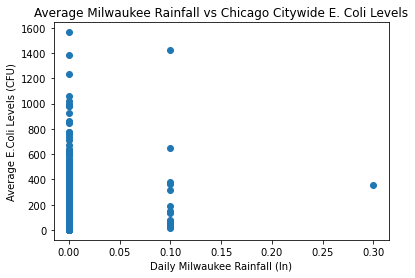

In [23]:
plt.scatter(culture_rain_ecoli["Rainfall (In)"], culture_rain_ecoli["Citywide Mean E Coli Level"])
plt.xlabel("Daily Milwaukee Rainfall (In)")
plt.ylabel("Average E.Coli Levels (CFU)")
plt.title("Average Milwaukee Rainfall vs Chicago Citywide E. Coli Levels")
plt.show()

The r-squared value is 0.004574507459009841


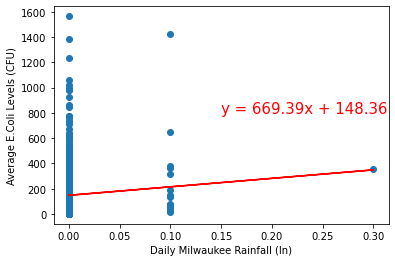

In [21]:
# Add the linear regression equation and line to plot
x_values = culture_rain_ecoli["Rainfall (In)"]
y_values = culture_rain_ecoli["Citywide Mean E Coli Level"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.15,800),fontsize=15,color="red")
plt.xlabel("Daily Milwaukee Rainfall (In)")
plt.ylabel("Average E.Coli Levels (CFU)")
print(f"The r-squared value is {rvalue**2}")
plt.show()

In [7]:
culture_rain_ecoli.groupby("Year").sum()

,Rainfall (In),Month,Citywide Mean E Coli Level
Year,,,
2008,0.0,389,6776.972222
2009,0.3,564,13616.873659
2010,0.2,532,10815.490668
2011,0.4,564,11570.232334
2012,0.3,658,15439.409505
2013,0.2,650,15454.548838
2014,0.5,640,15577.480976
2015,0.2,692,16499.901263
2016,0.1,747,10703.090431


In [8]:
culture_rain_ecoli.groupby("Month").sum()

,Rainfall (In),Year,Citywide Mean E Coli Level
Month,,,
5,0.1,134844,12295.748442
6,0.8,402514,29032.591279
7,0.6,452707,33163.192927
8,0.7,446680,33235.482350
9,0.0,120833,8725.984899
10,0.0,2016,1.000000


In [9]:
DNA_rain_data = pd.read_csv("Milwaukee_DNA_Rainfall.csv", index_col=0)
DNA_rain_data["Date"] = pd.to_datetime(DNA_rain_data["Date"],format= "%Y-%m-%d")

In [10]:
DNA_rain_data["Date"] = pd.to_datetime(DNA_rain_data["Date"], yearfirst=True)
DNA_rain_data["Year"] = pd.DatetimeIndex(DNA_rain_data["Date"]).year
DNA_rain_data["Month"] = pd.DatetimeIndex(DNA_rain_data["Date"]).month
DNA_rain_data

,Date,Rainfall (In),Year,Month
390,2015-05-26,0.0,2015,5
274,2015-05-27,0.0,2015,5
406,2015-05-28,0.0,2015,5
200,2015-06-01,0.0,2015,6
178,2015-06-02,0.0,2015,6
...,...,...,...,...
171,2019-09-01,0.0,2019,9
172,2019-09-02,0.0,2019,9
2,2020-07-06,0.0,2020,7
6,2020-07-07,0.2,2020,7


In [11]:
city_dna_ecoli = pd.read_csv("DNA_daily_citywide_means.csv", index_col =0)
city_dna_ecoli["Date"] = pd.to_datetime(city_dna_ecoli["Date"],format= "%Y-%m-%d")
city_dna_ecoli.head()

,Date,Citywide Mean E Coli Level
0,2015-05-26,147.8
1,2015-05-27,438.0
2,2015-05-28,223.4
3,2015-06-01,331.0
4,2015-06-02,157.8


In [12]:
DNA_rain_ecoli = pd.merge(DNA_rain_data, city_dna_ecoli, how="left", on="Date")
DNA_rain_ecoli

,Date,Rainfall (In),Year,Month,Citywide Mean E Coli Level
0,2015-05-26,0.0,2015,5,147.800000
1,2015-05-27,0.0,2015,5,438.000000
2,2015-05-28,0.0,2015,5,223.400000
3,2015-06-01,0.0,2015,6,331.000000
4,2015-06-02,0.0,2015,6,157.800000
...,...,...,...,...,...
428,2019-09-01,0.0,2019,9,219.000000
429,2019-09-02,0.0,2019,9,143.145000
430,2020-07-06,0.0,2020,7,636.231250
431,2020-07-07,0.2,2020,7,2340.941176


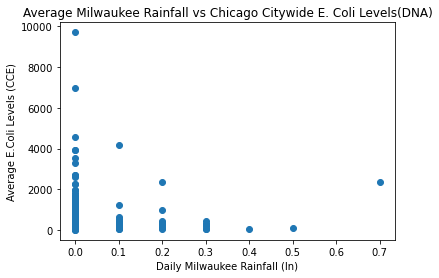

In [13]:
plt.scatter(DNA_rain_ecoli["Rainfall (In)"], DNA_rain_ecoli["Citywide Mean E Coli Level"])
plt.xlabel("Daily Milwaukee Rainfall (In)")
plt.ylabel("Average E.Coli Levels (CCE)")
plt.title("Average Milwaukee Rainfall vs Chicago Citywide E. Coli Levels(DNA)")
plt.show()

The r-squared value is 0.00028821378076402244


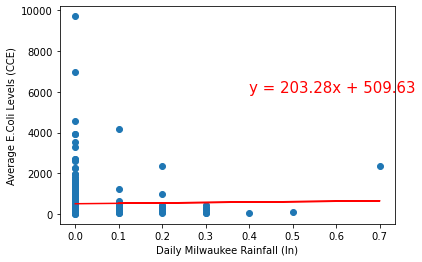

In [19]:
# Add the linear regression equation and line to plot
x_values = DNA_rain_ecoli["Rainfall (In)"]
y_values = DNA_rain_ecoli["Citywide Mean E Coli Level"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.4,6000),fontsize=15,color="red")
plt.xlabel("Daily Milwaukee Rainfall (In)")
plt.ylabel("Average E.Coli Levels (CCE)")
print(f"The r-squared value is {rvalue**2}")
plt.show()

In [14]:
DNA_rain_ecoli.groupby("Year").sum()

,Rainfall (In),Month,Citywide Mean E Coli Level
Year,,,
2015,0.0,371,21023.233333
2016,0.1,494,16382.113611
2017,0.4,711,61646.101086
2018,0.7,707,90160.572031
2019,5.9,703,29320.894785
2020,0.3,21,3641.629569


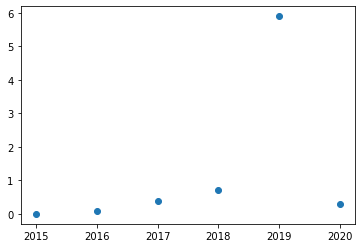

In [51]:
#plt.scatter(DNA_rain_data.groupby("Year").sum().index, DNA_rain_data.groupby("Year").sum()["Rainfall (In)"])

## Overlay bacteria levels on this and plot regression

In [37]:
DNA_rain_data.groupby("Month").sum()

,Rainfall (In),Year
Month,,
5,1.1,50441
6,1.8,260227
7,3.1,276372
8,1.4,260234
9,0.0,26224


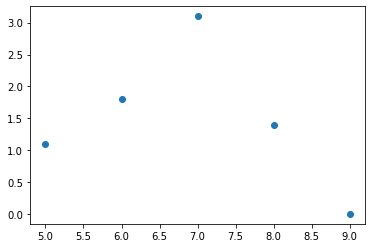

In [52]:
#plt.scatter(DNA_rain_data.groupby("Month").sum().index, DNA_rain_data.groupby("Month").sum()["Rainfall (In)"])

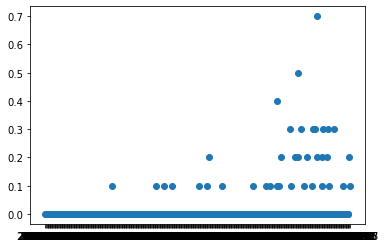

In [7]:
#plt.scatter(DNA_rain_data["Date"], DNA_rain_data["Rainfall (In)"])